In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import MaxNLocator

import warnings
warnings.filterwarnings('ignore')

In [2]:
oscar_comparative_box_office = pd.read_csv("oscar_comparative_box_office.csv")

In [3]:
grouped = oscar_comparative_box_office.groupby("Year")

In [4]:
box_office_mean = []
box_office_std = []
box_office_year = []
box_office_max = []

for year, info in grouped:
    box_office_mean.append(info['BoxOfficeRatio'].mean())
    box_office_std.append(info['BoxOfficeRatio'].std())
    box_office_year.append(year)
    box_office_max.append(info['BoxOfficeRatio'].max())
    
grouped_df = {
   'box_office_year' : box_office_year,
   'box_office_max' : box_office_max,
   'box_office_mean' : box_office_mean,
   'box_office_std' : box_office_std,
    }

In [5]:
oscar_eda = pd.DataFrame(grouped_df)

In [6]:
oscar_comparative_box_office[oscar_comparative_box_office['Year'] == 1990]

,IMDbID,Title,Year,BoxOffice,OscarWinner,TopBoxOfficeTitle,TopBoxOfficeValue,BoxOfficeRatio,BoxOfficePercentage
197,tt0099653,Ghost,1990,217631306.0,0,Home Alone,285761243.0,0.761584,76.16%
195,tt0099348,Dances with Wolves,1990,184208848.0,1,Home Alone,285761243.0,0.644625,64.46%
198,tt0099674,The Godfather: Part III,1990,66666062.0,0,Home Alone,285761243.0,0.233293,23.33%
196,tt0099077,Awakenings,1990,52096475.0,0,Home Alone,285761243.0,0.182308,18.23%
199,tt0099685,Goodfellas,1990,46836214.0,0,Home Alone,285761243.0,0.163900,16.39%


In [68]:
conta_1 = oscar_comparative_box_office[oscar_comparative_box_office['BoxOfficeRatio'] >= 0.75]['Year'].value_counts()

conta_2 = oscar_comparative_box_office[oscar_comparative_box_office['BoxOfficeRatio'] < 0.75][oscar_comparative_box_office['BoxOfficeRatio'] >= 0.5]['Year'].value_counts()

conta_3 = oscar_comparative_box_office[oscar_comparative_box_office['BoxOfficeRatio'] < 0.5][oscar_comparative_box_office['BoxOfficeRatio'] >= 0.25]['Year'].value_counts()

conta_4 = oscar_comparative_box_office[oscar_comparative_box_office['BoxOfficeRatio'] < 0.25]['Year'].value_counts()

In [69]:
box_office_counts = pd.concat([conta_1, conta_2, conta_3, conta_4], axis=1).replace(np.nan, 0)
box_office_counts.columns = ['0.75 or more', '0.5 to 0.75', '0.25 to 0.50', '0.25 or less']
box_office_counts

,0.75 or more,0.5 to 0.75,0.25 to 0.50,0.25 or less
1977,1.0,0.0,0.0,3.0
1978,0.0,1.0,1.0,2.0
1979,1.0,1.0,1.0,3.0
1980,0.0,0.0,2.0,3.0
1981,1.0,1.0,1.0,1.0
1982,1.0,0.0,1.0,3.0
1983,0.0,0.0,1.0,4.0
1984,0.0,0.0,0.0,5.0
1985,0.0,0.0,3.0,3.0
1986,1.0,0.0,0.0,3.0


In [82]:
dicionario = {
    
}

for column in box_office_counts.columns:
    value_list = []
    for year in box_office_counts.index:

        
        value_list.append([str(year)] * int(box_office_counts[column].loc[year]))
#         print(str(year), int(box_office_counts[column].loc[year]))
        dicionario[column] = value_list
        
box_office_year_counts = pd.DataFrame(dicionario, index = box_office_counts.index)

In [83]:
box_office_year_counts

,0.75 or more,0.5 to 0.75,0.25 to 0.50,0.25 or less
1977,[1977],[],[],"[1977, 1977, 1977]"
1978,[],[1978],[1978],"[1978, 1978]"
1979,[1979],[1979],[1979],"[1979, 1979, 1979]"
1980,[],[],"[1980, 1980]","[1980, 1980, 1980]"
1981,[1981],[1981],[1981],[1981]
1982,[1982],[],[1982],"[1982, 1982, 1982]"
1983,[],[],[1983],"[1983, 1983, 1983, 1983]"
1984,[],[],[],"[1984, 1984, 1984, 1984, 1984]"
1985,[],[],"[1985, 1985, 1985]","[1985, 1985, 1985]"
1986,[1986],[],[],"[1986, 1986, 1986]"


TypeError: unhashable type: 'list'

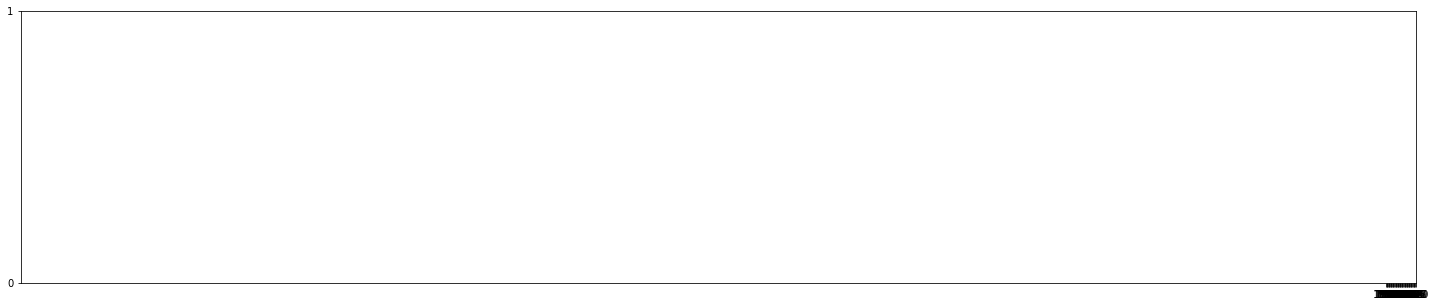

In [85]:
ax = plt.figure(figsize = (25, 5)).gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# min_val = box_office_counts.index.min()
# max_val = box_office_counts.index.max()
# val_width = max_val - min_val
# n_bins = len(box_office_counts.index)
# bin_width = val_width / n_bins

# plt.xticks(np.arange(min_val - bin_width, max_val + bin_width, bin_width))
# plt.xticks(np.arange(min_val-bin_width/2, max_val+bin_width/2, bin_width))

plt.xticks(box_office_counts.index)
sns.histplot(data = box_office_year_counts,
             x = box_office_year_counts.index,
             y = '0.75 or more',
             bins = len(box_office_year_counts.index),
#              fill = False,
             discrete = False
             )
plt.show()

Text(0, 0.5, 'Count')

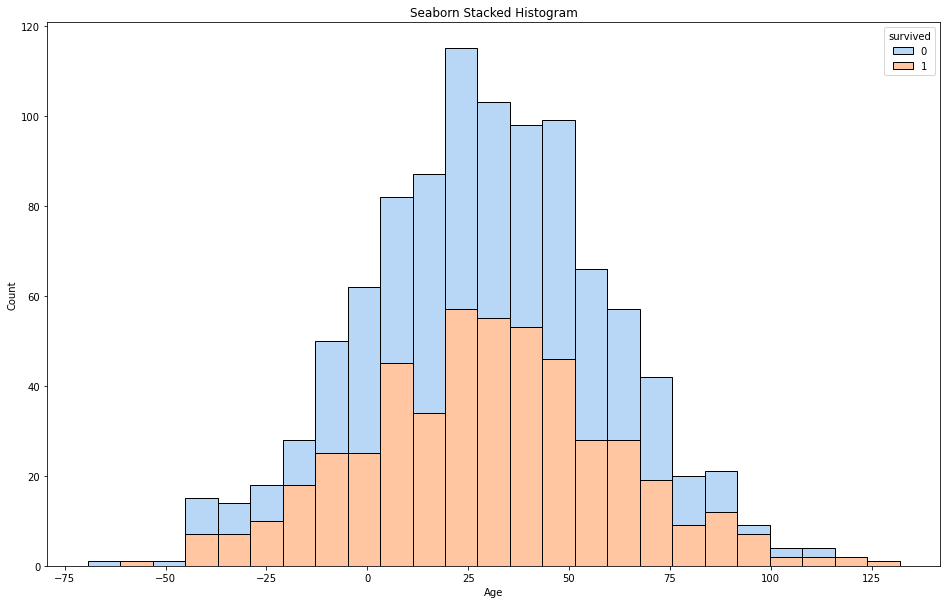

In [114]:
f = plt.figure(figsize=(16, 10))
ax = f.add_subplot(1,1,1)

# mock your data frame

_df = pd.DataFrame({
    "age":np.random.normal(30,30,1000),
    "survived":np.random.randint(0,2,1000)
})

# plot
import seaborn as sns
sns.histplot(data=_df, ax=ax, stat="count", multiple="stack",
             x="age", kde=False,
             palette="pastel", hue="survived",
             element="bars", legend=True)
ax.set_title("Seaborn Stacked Histogram")
ax.set_xlabel("Age")
ax.set_ylabel("Count")